In [2]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import os
import json
import matplotlib.pyplot as plt
import seaborn.objects as so
from matplotlib.ticker import MultipleLocator
import sys
sys.path.append('../')
from python_scripts.decomposer import decompose
from python_scripts.translator import translate

# Load Data
#shap_vals = np.load("../Attia/shap_values/debugging_shap_vals_entry10_for_1a01rausczag4unrsujivsxzm_raw.json.npy")

print(shap_vals.shape)
shap_vals = shap_vals[1] # IM JUST GONNA ASSUME THAT BOTH THE LEADS ARE JUST REPEATED IN EACH ROW ):
shap_vals = shap_vals.reshape((2, 5000))
print(shap_vals.shape)
shaps_df = pd.DataFrame(shap_vals, index=['Lead1', 'Lead2'])

shaps_df

(2, 1, 10000)
(2, 5000)


,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
Lead1,0.0,0.0,0.0,0.0,0.0,0.00733,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lead2,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
def get_patient_ecg_array(patient_path="1a01rausczag4unrsujivsxzm_raw.json"):
    dir_path = '../../../../../../../local1/CSE_XAI/small_data/'
    path = dir_path+patient_path
    patient_X = np.empty((2, 5000))

    try:
        jsonFile = open(path, 'r')
        print("Found the file!")
    except:
        print(path + " is not a valid ECG recording file. Will use the default file.")
        path = dir_path+"1a01rausczag4unrsujivsxzm_raw.json"
        jsonFile = open(path, 'r')

    fileContents = json.load(jsonFile)

    # digging into the dictionaries to get lead data
    lead_1_samples = fileContents['samples']
    lead_2_samples = fileContents['extraLeads'][0]['samples']
    # Crop the data to 5000 data points (5 seconds).
    patient_X[0,:] = lead_1_samples[0:5000]
    patient_X[1,:] = lead_2_samples[0:5000]

    return patient_X

In [25]:
X = get_patient_ecg_array("1di3u25vlxm0o39rexwfbqc41_raw.json")
waves = decompose(X)
waves

Found the file!
Bad ECG :(
Bad ECG :(


{'R1': array([ 187,  290,  597,  940, 1269, 1622, 1969, 2299, 2637, 2987, 3335,
        3663, 4008, 4357, 4704]),
 'R2': array([ 184,  279,  593,  940, 1269, 1621, 1967, 2298, 2637, 2987, 3335,
        3663, 4007, 4358, 4703]),
 'P': [(157, 209),
  (506, 544),
  (853, 872),
  (1158, 1183),
  (1509, 1552),
  (1890, 1905),
  (2221, 2242),
  (2558, 2568),
  (2910, 2937),
  (3233, 3260),
  (3594, 3614),
  (3929, 3962),
  (4286, 4317),
  (4656, 4683)],
 'PR': [],
 'QRS': [(92, 269),
  (209, 316),
  (544, 630),
  (872, 969),
  (1183, 1325),
  (1552, 1660),
  (1905, 2017),
  (2242, 2330),
  (2568, 2673),
  (2937, 3018),
  (3260, 3372),
  (3614, 3686),
  (3962, 4049),
  (4317, 4406),
  (4683, 4754)],
 'ST': [],
 'T': [(269, 294),
  (316, 390),
  (630, 671),
  (969, 1011),
  (1325, 1354),
  (1660, 1683),
  (2017, 2046),
  (2330, 2358),
  (2673, 2690),
  (3018, 3038),
  (3372, 3388),
  (3686, 3713),
  (4049, 4089),
  (4406, 4438),
  (4754, 4799)],
 'TP': [(294, 506),
  (390, 853),
  (671, 1158),

[(-2.0, 2.0)]

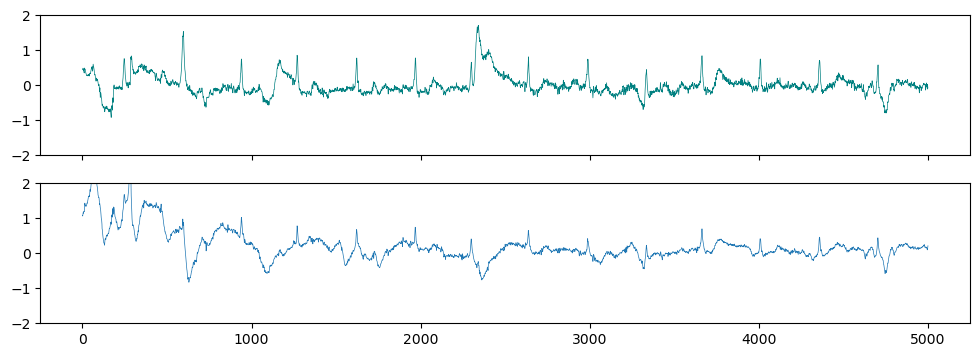

In [26]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12,4))
sns.lineplot(X[0], ax=axes[0], color='teal', linewidth = 0.5).set(ylim=[-2,2])
sns.lineplot(X[1], ax=axes[1],  linewidth = 0.5).set(ylim=[-2,2])

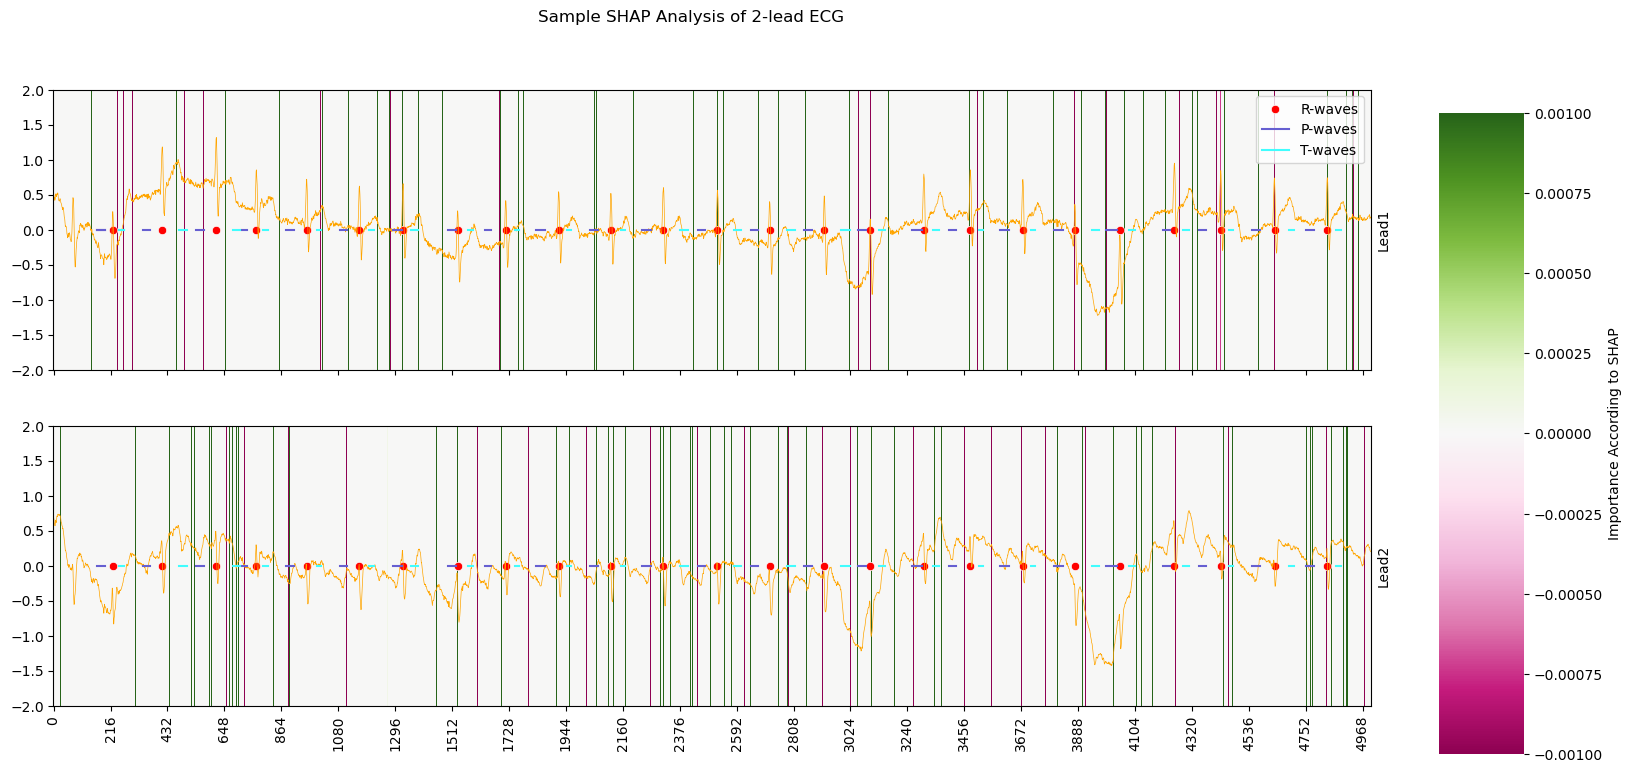

In [8]:
# Plot

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(17,8))
plt.tick_params(bottom='on')
fig.suptitle('Sample SHAP Analysis of 2-lead ECG')

cbar_ax = fig.add_axes([.94, 0.05, .05, .8])
sns.heatmap(np.asarray(shaps_df.loc['Lead1']).reshape(1, 5000), cmap="PiYG", ax=axes[0], vmin=-0.001, vmax=0.001, 
            yticklabels=False, cbar_ax = cbar_ax, cbar_kws={'label': 'Importance According to SHAP'})
sns.heatmap(np.asarray(shaps_df.loc['Lead2']).reshape(1, 5000), cmap="PiYG", ax=axes[1], vmin=-0.001, vmax=0.001, 
            yticklabels=False, cbar_ax = cbar_ax, cbar_kws={'label': 'Importance According to SHAP'})


ax_l1 = axes[0].twinx()
ax_l2 = axes[1].twinx()

sns.lineplot(X[0], ax=ax_l1, color='orange', linewidth = 0.5).set(ylim=[-2,2])
sns.lineplot(X[1], ax=ax_l2, color='orange', linewidth = 0.5).set(ylim=[-2,2])


axes[0].grid(False)
axes[1].grid(False)
axes[0].set_xticks(axes[0].get_xticks()[::2])
axes[1].set_xticks(axes[1].get_xticks()[::2]) 

ax_l1.yaxis.set_ticks_position('left')
ax_l2.yaxis.set_ticks_position('left')
ax_l1.set(ylabel="Lead1")
ax_l2.set(ylabel="Lead2")
ax_l1.grid(False)
ax_l2.grid(False)

sns.scatterplot(x=waves['R1'], y=np.zeros(len(waves['R1'])), ax=ax_l1, color='red', label='R-waves')
sns.scatterplot(x=waves['R1'], y=np.zeros(len(waves['R1'])), ax=ax_l2, color='red')

sns.lineplot(x=waves['P'][0], y=np.zeros(len(waves['P'][0])), ax=ax_l1, c=sns.xkcd_rgb['dark periwinkle'], label='P-waves')
for wave in waves['P']:
    sns.lineplot(x=wave, y=np.zeros(len(wave)), ax=ax_l1,  c=sns.xkcd_rgb['dark periwinkle'])
    sns.lineplot(x=wave, y=np.zeros(len(wave)), ax=ax_l2,  c=sns.xkcd_rgb['dark periwinkle'])

sns.lineplot(x=waves['T'][0], y=np.zeros(len(waves['T'][0])), ax=ax_l1, c=sns.xkcd_rgb['bright cyan'], label='T-waves')
for wave in waves['T']:
    sns.lineplot(x=wave, y=np.zeros(len(wave)), ax=ax_l1,  c=sns.xkcd_rgb['bright cyan'])
    sns.lineplot(x=wave, y=np.zeros(len(wave)), ax=ax_l2,  c=sns.xkcd_rgb['bright cyan'])

plt.savefig("notebookplot.png")

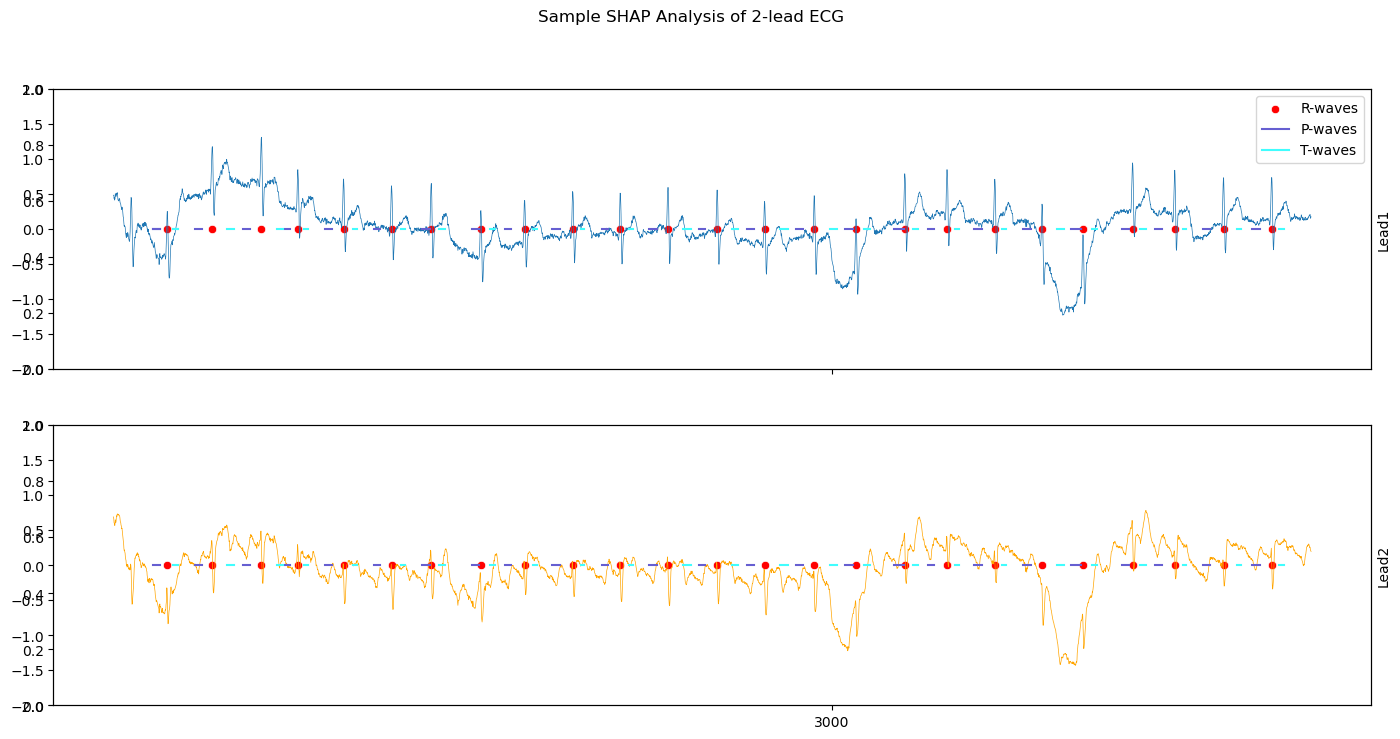

In [9]:
# Plot

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(17,8))
plt.tick_params(bottom='on')
fig.subtitle('Sample SHAP Analysis of 2-lead ECG')

"""cbar_ax = fig.add_axes([.94, 0.05, .05, .8])
sns.heatmap(np.asarray(shaps_df.loc['Lead1']).reshape(1, 5000), cmap="PiYG", ax=axes[0], vmin=-0.001, vmax=0.001, 
            yticklabels=False, cbar_ax = cbar_ax, cbar_kws={'label': 'Importance According to SHAP'})
sns.heatmap(np.asarray(shaps_df.loc['Lead2']).reshape(1, 5000), cmap="PiYG", ax=axes[1], vmin=-0.001, vmax=0.001, 
            yticklabels=False, cbar_ax = cbar_ax, cbar_kws={'label': 'Importance According to SHAP'})
"""

ax_l1 = axes[0].twinx()
ax_l2 = axes[1].twinx()

sns.lineplot(X[0], ax=ax_l1, linewidth = 0.5).set(ylim=[-2,2])
sns.lineplot(X[1], ax=ax_l2, color='orange', linewidth = 0.5).set(ylim=[-2,2])


axes[0].grid(False)
axes[1].grid(False)
axes[0].set_xticks(axes[0].get_xticks()[::2])
axes[1].set_xticks(axes[1].get_xticks()[::2]) 

ax_l1.yaxis.set_ticks_position('left')
ax_l2.yaxis.set_ticks_position('left')
ax_l1.set(ylabel="Lead1")
ax_l2.set(ylabel="Lead2")
ax_l1.grid(False)
ax_l2.grid(False)

sns.scatterplot(x=waves['R1'], y=np.zeros(len(waves['R1'])), ax=ax_l1, color='red', label='R-waves')
sns.scatterplot(x=waves['R1'], y=np.zeros(len(waves['R1'])), ax=ax_l2, color='red')

sns.lineplot(x=waves['P'][0], y=np.zeros(len(waves['P'][0])), ax=ax_l1, c=sns.xkcd_rgb['dark periwinkle'], label='P-waves')
for wave in waves['P']:
    sns.lineplot(x=wave, y=np.zeros(len(wave)), ax=ax_l1,  c=sns.xkcd_rgb['dark periwinkle'])
    sns.lineplot(x=wave, y=np.zeros(len(wave)), ax=ax_l2,  c=sns.xkcd_rgb['dark periwinkle'])

sns.lineplot(x=waves['T'][0], y=np.zeros(len(waves['T'][0])), ax=ax_l1, c=sns.xkcd_rgb['bright cyan'], label='T-waves')
for wave in waves['T']:
    sns.lineplot(x=wave, y=np.zeros(len(wave)), ax=ax_l1,  c=sns.xkcd_rgb['bright cyan'])
    sns.lineplot(x=wave, y=np.zeros(len(wave)), ax=ax_l2,  c=sns.xkcd_rgb['bright cyan'])


In [6]:
translate(shap_vals, waves)

['The model has detected a QRS-complex abnormality at 433 ms in lead I.',
 'The model has detected a QRS-complex abnormality at 629 ms in lead I.',
 'The model has detected a TP-segment abnormality at 1229 ms in lead I.',
 'The model has detected a T-wave abnormality at 3004 ms in lead I.',
 'The model has detected a QRS-complex abnormality at 3476 ms in lead I.',
 'The model has detected a TP-segment abnormality at 3529 ms in lead I.',
 'The model has detected a TP-segment abnormality at 3760 ms in lead I.',
 'The model has detected a QRS-complex abnormality at 4422 ms in lead I.',
 'The model has detected a QRS-complex abnormality at 4829 ms in lead I.',
 'The model has detected a TP-segment abnormality at 285 ms in lead II.',
 'The model has detected a ST-segment abnormality at 663 ms in lead II.',
 'The model has detected a T-wave abnormality at 694 ms in lead II.',
 'The model has detected a TP-segment abnormality at 813 ms in lead II.',
 'The model has detected a P-wave abnormali

In [ ]:
# Plot

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(17,8))
plt.tick_params(bottom='on')
fig.suptitle('Sample SHAP Analysis of 2-lead ECG')

cbar_ax = fig.add_axes([.94, 0.05, .05, .8])
sns.heatmap(np.asarray(shaps_df.loc['Lead1']).reshape(1, 5000), cmap="PiYG", ax=axes[0], vmin=-0.001, vmax=0.001, 
            yticklabels=False, cbar_ax = cbar_ax, cbar_kws={'label': 'Importance According to SHAP'})
sns.heatmap(np.asarray(shaps_df.loc['Lead2']).reshape(1, 5000), cmap="PiYG", ax=axes[1], vmin=-0.001, vmax=0.001, 
            yticklabels=False, cbar_ax = cbar_ax, cbar_kws={'label': 'Importance According to SHAP'})


ax_l1 = axes[0].twinx()
ax_l2 = axes[1].twinx()

sns.lineplot(X[0], ax=ax_l1, color='orange', linewidth = 0.5).set(ylim=[-2,2])
sns.lineplot(X[1], ax=ax_l2, color='orange', linewidth = 0.5).set(ylim=[-2,2])


axes[0].grid(False)
axes[1].grid(False)
axes[0].set_xticks(axes[0].get_xticks()[::2])
axes[1].set_xticks(axes[1].get_xticks()[::2]) 

ax_l1.yaxis.set_ticks_position('left')
ax_l2.yaxis.set_ticks_position('left')
ax_l1.set(ylabel="Lead1")
ax_l2.set(ylabel="Lead2")
ax_l1.grid(False)
ax_l2.grid(False)

sns.scatterplot(x=waves['R1'], y=np.zeros(len(waves['R1'])), ax=ax_l1, color='red', label='R-waves')
sns.scatterplot(x=waves['R1'], y=np.zeros(len(waves['R1'])), ax=ax_l2, color='red')

sns.lineplot(x=waves['P'][0], y=np.zeros(len(waves['P'][0])), ax=ax_l1, c=sns.xkcd_rgb['dark periwinkle'], label='P-waves')
for wave in waves['P']:
    sns.lineplot(x=wave, y=np.zeros(len(wave)), ax=ax_l1,  c=sns.xkcd_rgb['dark periwinkle'])
    sns.lineplot(x=wave, y=np.zeros(len(wave)), ax=ax_l2,  c=sns.xkcd_rgb['dark periwinkle'])

sns.lineplot(x=waves['T'][0], y=np.zeros(len(waves['T'][0])), ax=ax_l1, c=sns.xkcd_rgb['bright cyan'], label='T-waves')
for wave in waves['T']:
    sns.lineplot(x=wave, y=np.zeros(len(wave)), ax=ax_l1,  c=sns.xkcd_rgb['bright cyan'])
    sns.lineplot(x=wave, y=np.zeros(len(wave)), ax=ax_l2,  c=sns.xkcd_rgb['bright cyan'])
